In [ ]:
# Import necessary libraries
import pandas as pd # Handling data related operaions
import numpy as np # Mathematical operations
import matplotlib.pyplot as plt #Visualisations
import seaborn as sns #Visualisations
from sklearn.cluster import KMeans # ML tool
from sklearn.preprocessing import StandardScaler # Adjust data for better accuracy

In [ ]:
from google.colab import drive

In [ ]:
#Mount google drive to enable you access your dataset stored there
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Define the file path based on the direction of your dataset and load it
file_path = "/content/drive/My Drive/PORTFOLIO/DATASETS/Online_retail.csv"


In [ ]:
#Read the dataset
df = pd.read_csv(file_path)

In [ ]:
print(len(df))

541909


In [ ]:
#Display the first few rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


DATA CLEANING

In [ ]:
#Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
#Keep only positive quantity and price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [ ]:
# Let's create a new feature called TotalSpend
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']

In [ ]:
#Now we begin grouping for clustering (by CustomerID)
customer_df = df.groupby('CustomerID').agg({
    'TotalSpend': 'sum',
    'Quantity': 'sum'
}).reset_index()


In [ ]:
#Next up: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df[['TotalSpend', 'Quantity']])

In [ ]:
#Determine optimal K using the Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

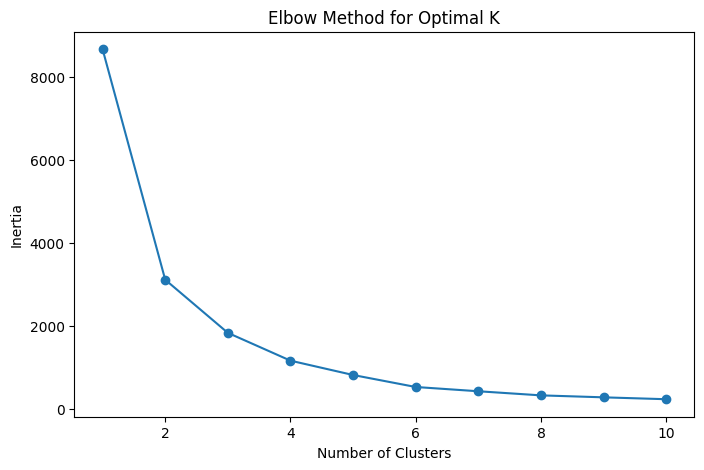

In [ ]:
#Plot using the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
#Now we apply KMeans with optimal K assuming that k=5 based on elbow plot
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
customer_df['Cluster'] = kmeans.fit_predict(scaled_data)

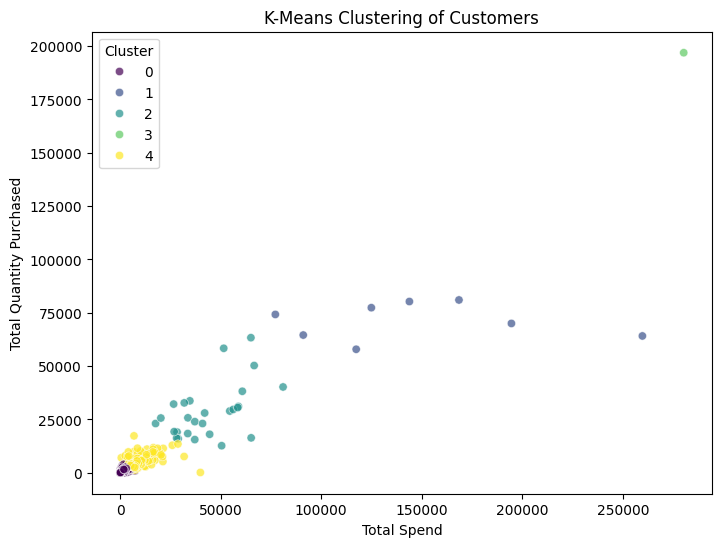

In [ ]:
# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=customer_df['TotalSpend'],
    y=customer_df['Quantity'],
    hue=customer_df['Cluster'],
    palette='viridis', alpha=0.7 )
plt.xlabel('Total Spend')
plt.ylabel('Total Quantity Purchased')
plt.title('K-Means Clustering of Customers')
plt.show()


CONCLUSION

The K-Means clustering analysis successfully segmented customers into distinct groups based on their total spending and quantity purchased. The visualization highlights different customer behaviors, such as high-value customers, frequent buyers, and occasional shoppers. These insights can help businesses tailor marketing strategies, optimize pricing, and enhance customer engagement.